# Insurance Claims Fraud Detection Project

### Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

**Independent Variables:**
1.	`months_as_customer:` Number of months of patronage
2.	`age:` the length of time a customer has lived or a thing has existed
3.	`policy_number:` It is a unique id given to the customer, to track the subscription status and other details of customer
4.	`policy_bind_date:`date which document that is given to customer after we accept your proposal for insurance
5.	`policy_state:` This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	`policy_csl:` is basically Combined Single Limit
7.	`policy_deductable:` the amount of money that a customer is responsible for paying toward an insured loss
8.	`policy_annual_premium:` This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	`umbrella_limit:` This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	`insured_zip:` It is the zip code where the insurance was made.
11.	`insured_sex:` This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	`insured_education_level:` This refers to the Level of education of the customer
13.	`insured_occupation:` This refers Occupation of the customer
14.	`insured_hobbies:` This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	`insured_relationship:` This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	`capital-gains:` This refers to profit accrued due to insurance premium
17.	`capital-loss:` This refers to the losses incurred due to insurance claims
18.	`incident_date:` This refers to the date which claims where made by customers
19.	`incident_type:` This refers to the type of claim/vehicle damage made by customer
20.	`collision_type:` This refers to the area of damage on the vehicle
21.	`incident_severity:` This refers to the extent/level of damage
22.	`authorities_contacted:` This refers to the government agencies that were contacted after damage
23.	`incident_state:` This refers to the state at which the accident happened
24.	`incident_city:` This refers to the city at which the accident happened
25.	`Incident_location:` This refers to the location at which the accident happened
26.	`incident_hour_of_the_day:` The period of the day which accident took place
27.	`number_of_vehicles_involved:` This refers to number of vehicles involved the accident
28.	`property_damage:` This refers to whether property was damaged or not
29.	`bodily_injuries:` This refers to injuries sustained
30.	`witnesses:` This refers to the number of witnesses involved
31.	`police_report_available:` This refers to whether the report on damage was documented or not
32.	`total_claim_amount:` This refers to the financial implications involved in claims
33.	`injury_claim:` This refers to physical injuries sustained
34.	`property_claim:` This refers to property damages during incident
35.	`vehicle_claim:` This refers to property damages during incident
36.	`auto_make:` This refers to the make of the vehicle
37.	`auto_model:` This refers to the model of the vehicle
38.	`auto_year:` This refers to the year which the vehicle was manufactured
39.	`_c39:`
40.	`fraud_reported`

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv






### Importing Libraries:

In [150]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

### Importing Dataset

In [69]:
df = pd.read_csv('automobile_insurance.csv')

In [70]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

Here we downloaded the entire dataset on my local computer from ••	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv and then imported to jupiter notebook

The dataset includes 1000 rows x 40 columns.

In [71]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [72]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

In [73]:
df.sample(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
798                  46   24         718829       21-02-1999           OH   
17                  140   31         275265       15-11-2004           IN   
812                 404   56         485813       07-04-2010           IN   
881                 398   55         815883       02-07-1991           OH   
713                  58   23         520179       29-05-1992           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
798    250/500               2000                1568.47         4000000   
17    500/1000                500                 708.64         6000000   
812    250/500               1000                1361.16         4000000   
881    250/500               2000                1305.26               0   
713   500/1000               2000                1471.44         5000000   

     insured_zip insured_sex insured_education_level insured_occupation  \
798       454480      FEMALE             High School       armed-forces   
17        470610        MALE             High School  machine-op-inspct   
812       437944      FEMALE                 Masters   transport-moving   
881       455482        MALE                      MD    farming-fishing   
713       446657        MALE             High School   transport-moving   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
798        yachting            unmarried          46800             0   
17          reading            unmarried          53500             0   
812       cross-fit        not-in-family              0        -63700   
881       skydiving                 wife          66200        -49700   
713         reading            own-child          57500             0   

    incident_date             incident_type   collision_type  \
798    02-02-2015  Single Vehicle Collision   Side Collision   
17     06-01-2015  Single Vehicle Collision   Side Collision   
812    15-01-2015  Single Vehicle Collision  Front Collision   
881    08-01-2015  Single Vehicle Collision   Rear Collision   
713    20-01-2015  Single Vehicle Collision   Rear Collision   

    incident_severity authorities_contacted incident_state incident_city  \
798      Major Damage                  Fire             NY    Northbrook   
17         Total Loss                Police             WV     Northbend   
812      Minor Damage             Ambulance             VA     Hillsdale   
881      Major Damage                  Fire             VA     Hillsdale   
713      Major Damage                  Fire             NC     Riverwood   

    incident_location  incident_hour_of_the_day  number_of_vehicles_involved  \
798    2123 MLK Ridge                         7                            1   
17       4546 Tree St                         9                            1   
812      2798 1st Ave                        23                            1   
881    6440 Rock Lane                        18                            1   
713   6110 Rock Ridge                         8                            1   

    property_damage  bodily_injuries  witnesses police_report_available  \
798              NO                2          0                       ?   
17               NO                0          2                     YES   
812              NO                2          0                     YES   
881               ?                1          3                     YES   
713              NO                2          1                      NO   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
798               56600         11320            5660          39620   
17                77880         14160            7080          56640   
812               53100          5310            5310          42480   
881               36740          3340            6680          26720   
713               50380          4580            9160        

We see that in our dataset there are a total of 1000 rows and 40 columns present. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model. Also the problem statement says that we are suppose to predict the fraud reported column so it makes this to be a Classification problem!

In [10]:
df.shape

(1000, 40)

# Exploratory Data Analysis (EDA)

In [11]:
pd.set_option('display.max_columns', None)

Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.

In [13]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

Checking out all the column details that were truncated before and analyzing if we can drop any useless information column(s)

In [14]:
df.nunique().to_frame("Unique Values")

Unique Values
months_as_customer                     391
age                                     46
policy_number                         1000
policy_bind_date                       951
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          338
capital-loss                           354
incident_date                           60
incident_type                            4
collision_type                           4
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
incident_location                     1000
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          3
bodily_injuries                          3
witnesses                                4
police_report_available                  3
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2
_c39                                     0

Using the `nunique` method we are able to list down all the unique values present in our dataset columns. I do not see any column with one single unique value either so that is good. However there are 2 columns which have all the 1000 rows filled with unique data that will need to be removed as it won't help in our label prediction anyway.

**Dropping of Unnecessary columns:**

In [74]:
unnecessary_columns = [
    'policy_number',#the "policy_number" column serves only as a unique identifier for each row and doesn't provide meaningful information for our analysis or modeling
    'insured_zip',#the "insured_zip" column contains nearly unique values for each row and does not provide significant information for your analysis or modeling
    'incident_location'#the "incident_location" column serves only as a unique identifier for each row and doesn't provide meaningful information for your analysis or modeling,
]

df.drop(unnecessary_columns,axis=1,inplace=True)

I am dropping the `policy_number` and `incident_location`,`insured_zip` columns since I feel it is pretty much useless showing just a list of unique identifiers on each row without adding much insight into the prediction of our target label.

`collision_type`,`property_damage`,`police_report_available` these columns have a unique value ? which is wrong entry so i will replace this with np.nan



**Replace the `?` unique values with np.nan:**

In [75]:
df['collision_type'].replace('?', np.nan, inplace=True)
df['property_damage'].replace('?', np.nan, inplace=True)
df['police_report_available'].replace('?', np.nan, inplace=True)

These columns are categorical column so we will fill their null values by their mode values

In [76]:
#These columns are categorical column so we will fill their null values by their mode values
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

**Checking for Null Values:**

In [77]:
df.isna().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available     

The `isna` method along with the sum function gives us the details on the missing or null values. In the above cell we can see that the column `c39` is only filled null values and can be dropped.

<AxesSubplot:>

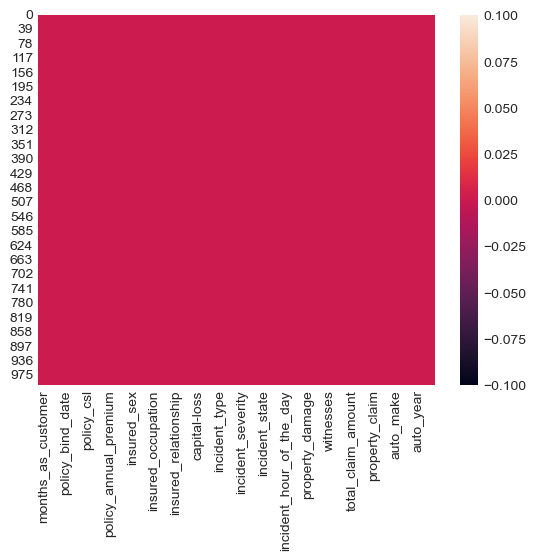

In [82]:
sns.heatmap(df.isnull())

In [78]:
df.drop("_c39", axis=1, inplace=True)

Removed the `c39` column that was only filled with null values.

In [79]:
df.head(2)

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   

              incident_type  collision_type incident_severity  \
0  Single Vehicle Collision  Side Collision      Major Damage   
1             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y

In [83]:
df.shape

(1000, 36)

**Checking duplicate values in the dataset:**

In [84]:
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [85]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

In [86]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**************************************************
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**************************************************
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
*******************************************

In [88]:
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level insured_occupation insured_hobbies  \
0                      MD       craft-repair        sleeping   
1                      MD  machine-op-inspct         reading   
2                     PhD              sales     board-games   
3                     PhD       armed-forces     board-games   
4               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   
2            own-child          35100             0    22-02-2015   
3            unmarried          48900        -62400    10-01-2015   
4            unmarried          66000        -46000    17-02-2015   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y  
2       2007              N  
3       2014              Y  
4       2009              N

In [89]:
df.shape

(1000, 36)

Now we will do feature engineering with date columns.
* There are 2 datetime column present in dataset
* handling the datetime values
* Converting Date columns from object type into datetime data type

In [90]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

Since Extraction is done now we can Drop policy_bind_date and incident_date columns

In [91]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [92]:
df.head(2)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   
1             0             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year fraud_reported  policy_bind_day  policy_bind_month  \
0       2004              Y               17                 10   
1       2007              Y               27                  6   

   policy_bind_year  incident_day  incident_month  incident_year  
0              2014            25               1           2015  
1              2006            21               1           2015

In [93]:
df.shape

(1000, 40)

Now we will handle policy_csl column because in this column numerical data separated by '/', resulting into object datatype.we will split the column into two part CSL_accditental and CSL_overall
The "policy_csl" column in your dataset likely represents the Combined Single Limit (CSL) in an insurance policy. CSL is a type of insurance coverage that combines both bodily injury liability and property damage liability coverage into a single limit. It means that the insurance policy will pay up to a certain total amount for all covered losses, which can be applied to bodily injury claims, property damage claims, or a combination of both

In [94]:
# Spliting and extracting policy_csl at '/'
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Overall']=df.policy_csl.str.split('/',expand=True)[1]
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [95]:
# Saperating Numerical Discreate Contineous  And Categorical columns
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
datetime_feature = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Datetime Feature Count: {}".format(len(datetime_feature)))

Numerical Features Count 22
Discrete feature Count 11
Continuous feature Count 11
Categorical feature Count 19
Datetime Feature Count: 0


**Statistical Analysis of Dataset:**

In [96]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  policy_bind_day  policy_bind_month  \
count    1000.000000  1000.000000      1000.000000        1000.000000   
mean    37928.950000  2005.103000        15.448000           6.559000   
std     18886.252893     6.015861         8.850176           3.391758   
min        70.000000  1995.000000         1.000000           1.000000   
25%     30292.500000  2000.000000         8.000000           4.000000   
50%     42100.000000  2005.000000        16.000000           7.000000   
75%     50822.500000  2010.000000        23.000000           9.000000   
max     79560.000000  2015.000000        31.000000          12.000000   

       policy_bind_year  incident_day  incident_month  incident_year  
count       1000.000000    1000.00000     1000.000000         1000.0  
mean        2001.604000      13.08400        3.407000         2015.0  
std            7.360391      10.44318        3.276291            0.0  
min         1990.000000       1.00000        1.000000         2015.0  
25%         1995.000000       2.00000        1.000000         2015.0  
50%         2002.000000      15.00000        2.000000         2015.0  
75%         2008.000000      22.00000        5.000000         2015.0  
max         2015.000000      31.00000       12.000000         2015.0

**Observations from the Dataset:**

**Months as Customer:**

* The average length of time a customer has been with the company is approximately 204 months, or about 17 years.
* The minimum value is 0, indicating there are customers who are relatively new to the company.
* The maximum value is 479, suggesting some customers have been with the company for a long time.

**Age:**

* The average age of customers is around 39 years.
* The minimum age is 19, indicating there are younger customers in the dataset.
* The maximum age is 64, suggesting there are older customers as well.

**Policy Deductible:**

* The policy deductible has a minimum value of 500 and a maximum value of 2000.
* The mean deductible is approximately 1136, indicating the average deductible amount.

**Policy Annual Premium:**

* The mean annual premium is approximately 1256.41.
* The minimum premium is 433.33, while the maximum premium is 2047.59.

**Umbrella Limit:**

* The umbrella limit ranges from -1,000,000 to 10,000,000.
* The mean umbrella limit is 1,101,000.

**Capital Gains:**

* Capital gains vary from 0 to 100,500, with an average of 25,126.10.
* The majority of customers seem to have capital gains close to zero.

**Capital Loss:**

* Capital losses range from -111,100 to 0, with an average loss of -26,793.70.
* Most customers have capital losses, with only a few having zero losses.

**Incident Hour of the Day:**

* Incidents occurred throughout the day, with an average incident hour around 11:38 AM.
* The incidents appear to be evenly distributed across the 24-hour period.

**Number of Vehicles Involved:**

* The number of vehicles involved in incidents ranges from 1 to 4, with an average of 1.84 vehicles involved.

**Bodily Injuries:**

* The number of bodily injuries varies from 0 to 2, with an average of 0.99 injuries.

These observations provide a summary of the basic statistics for several numerical features in the dataset. Further analysis and visualization can help uncover more insights and patterns in the data.

### Taking Insigts By Visualizing The Data
#### categorical_feature

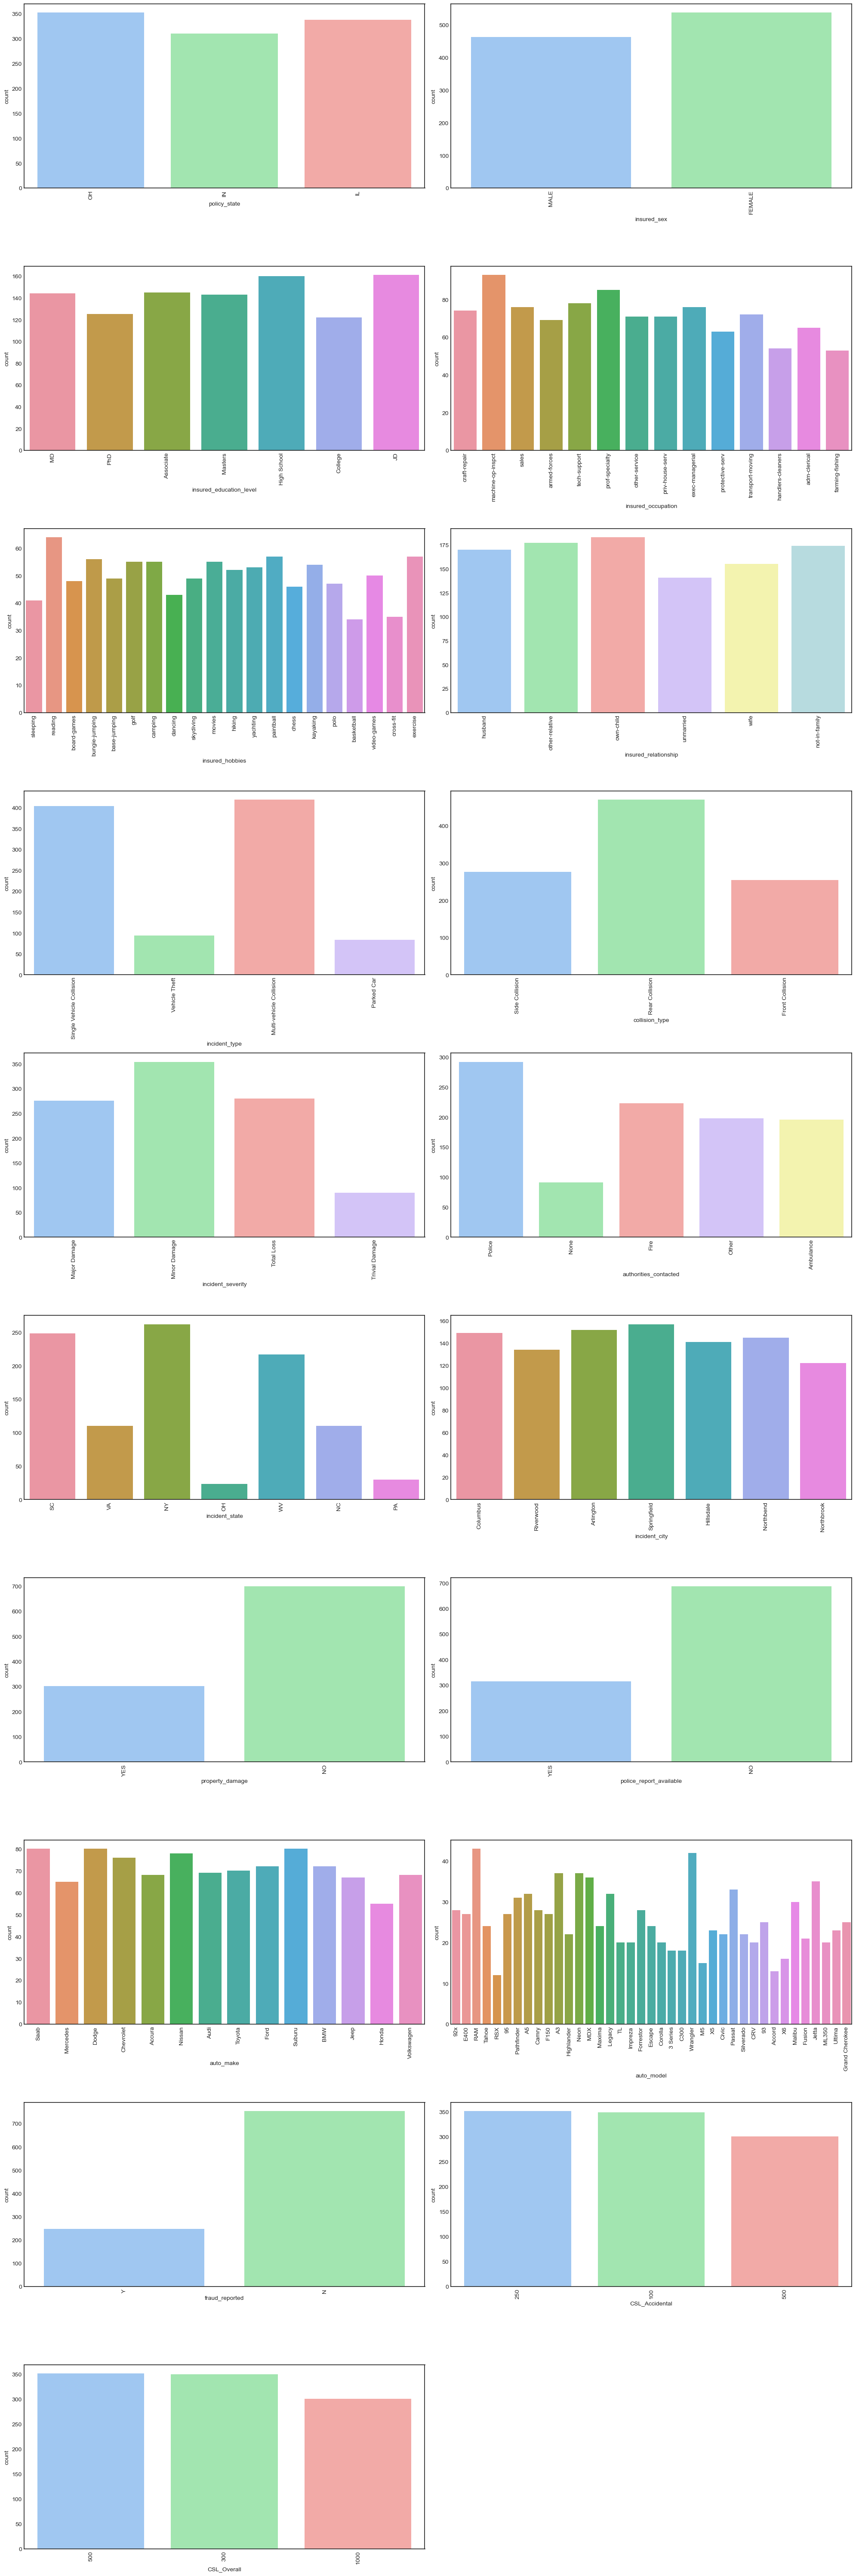

In [97]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))
# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(10, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:>

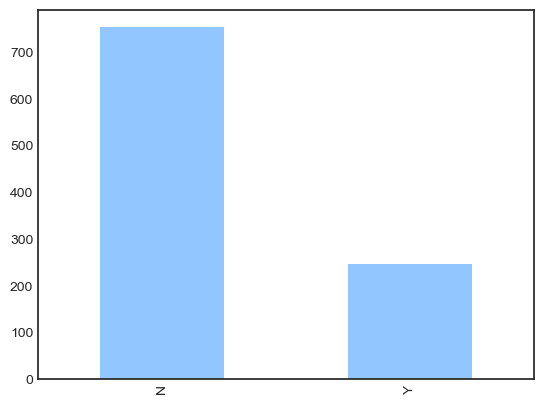

In [98]:
# checking the distribution in the target column 
df.fraud_reported.value_counts().plot(kind='bar')

Our target column is imbalanced

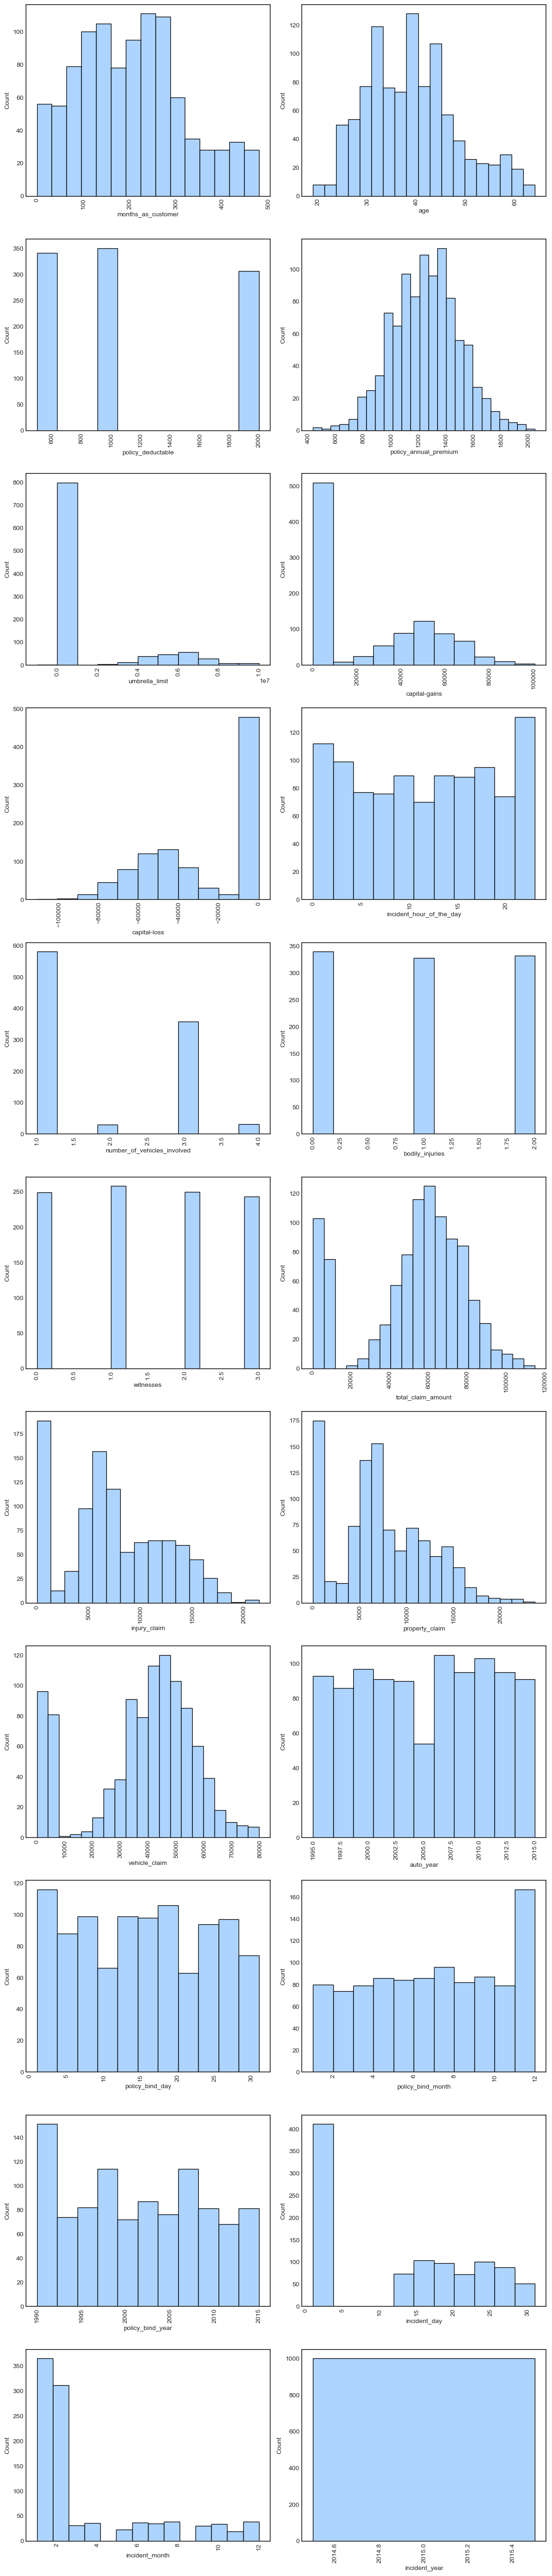

In [99]:
# Create the subplots
fig = plt.figure(figsize=(12, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

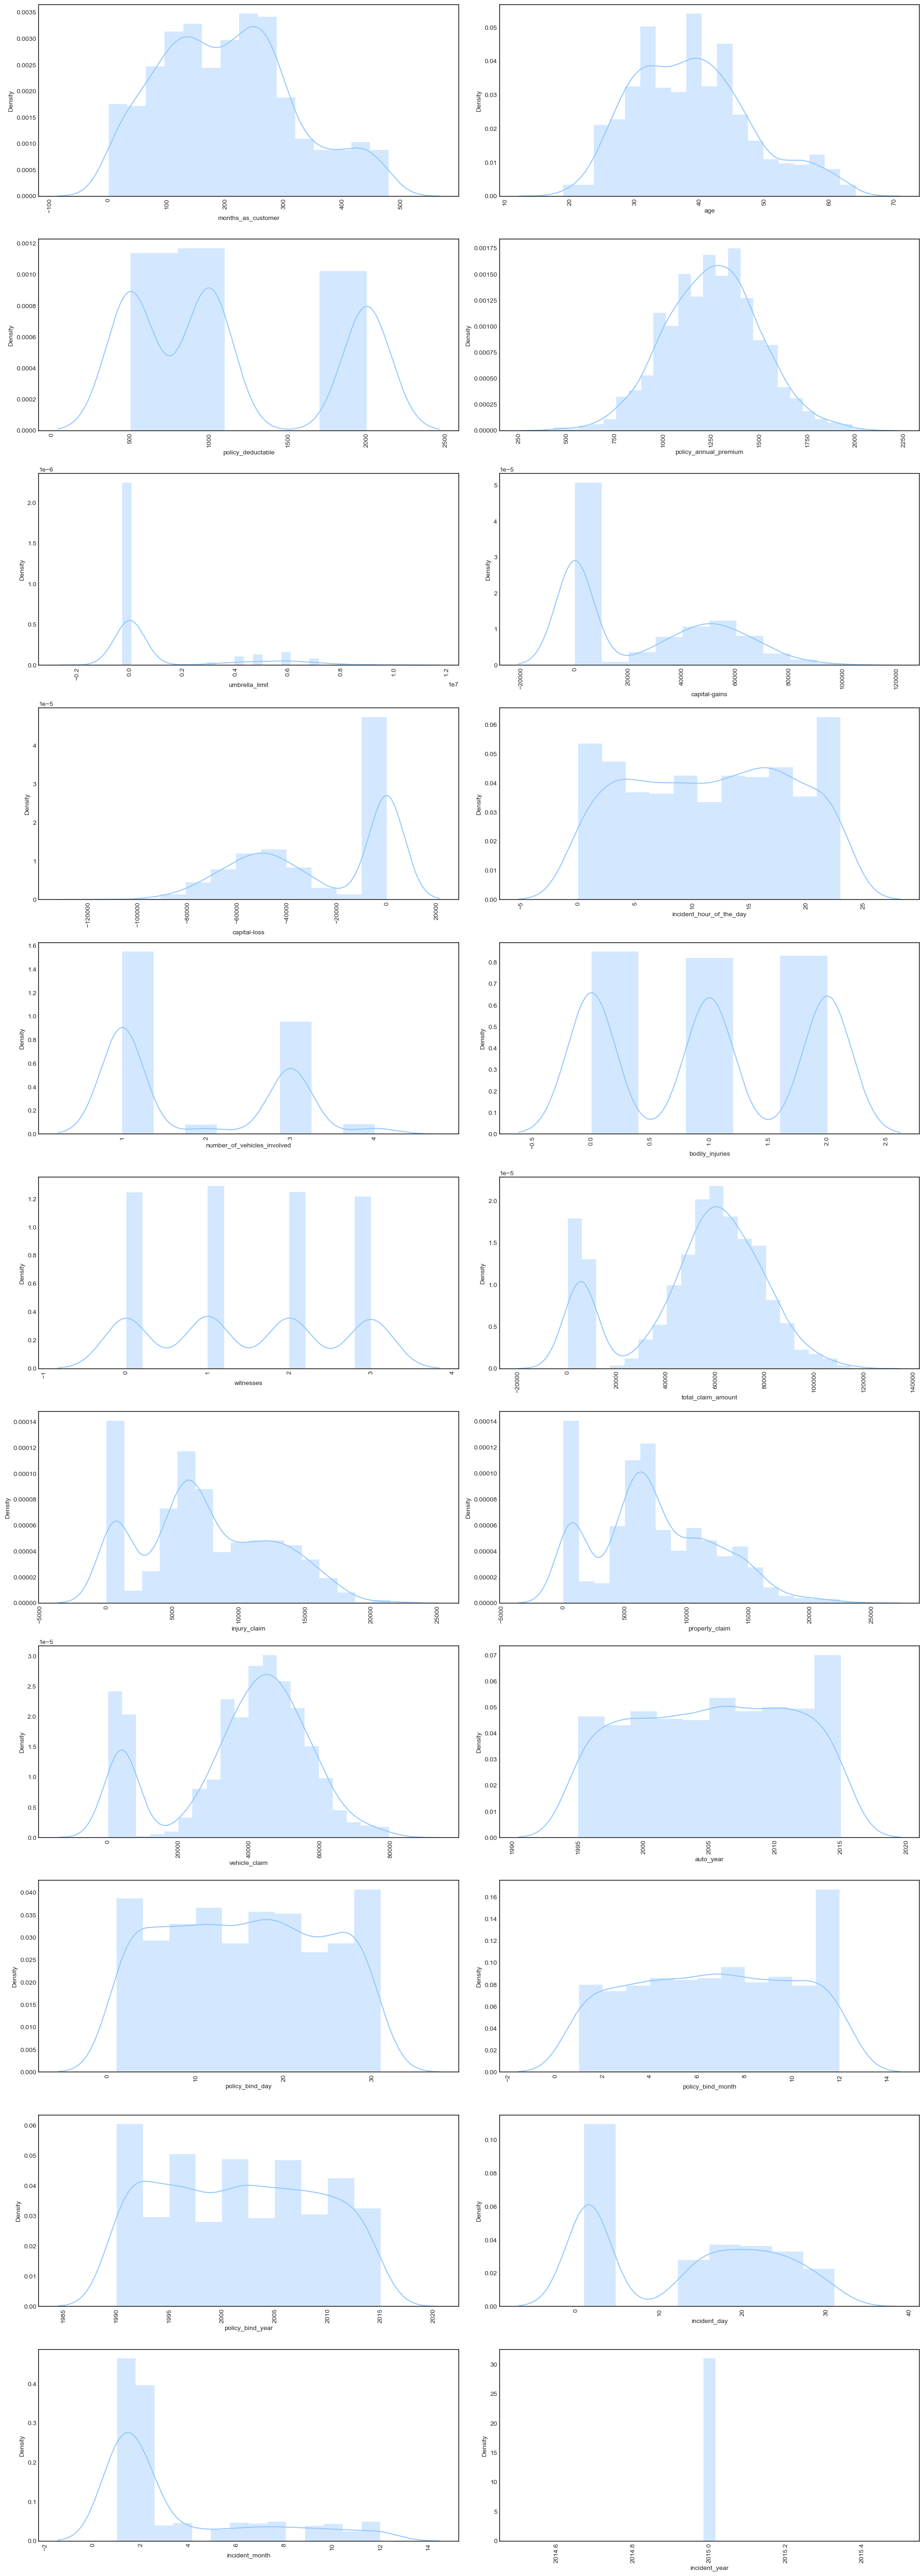

In [100]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Here we can see that some columns are not normally distributed

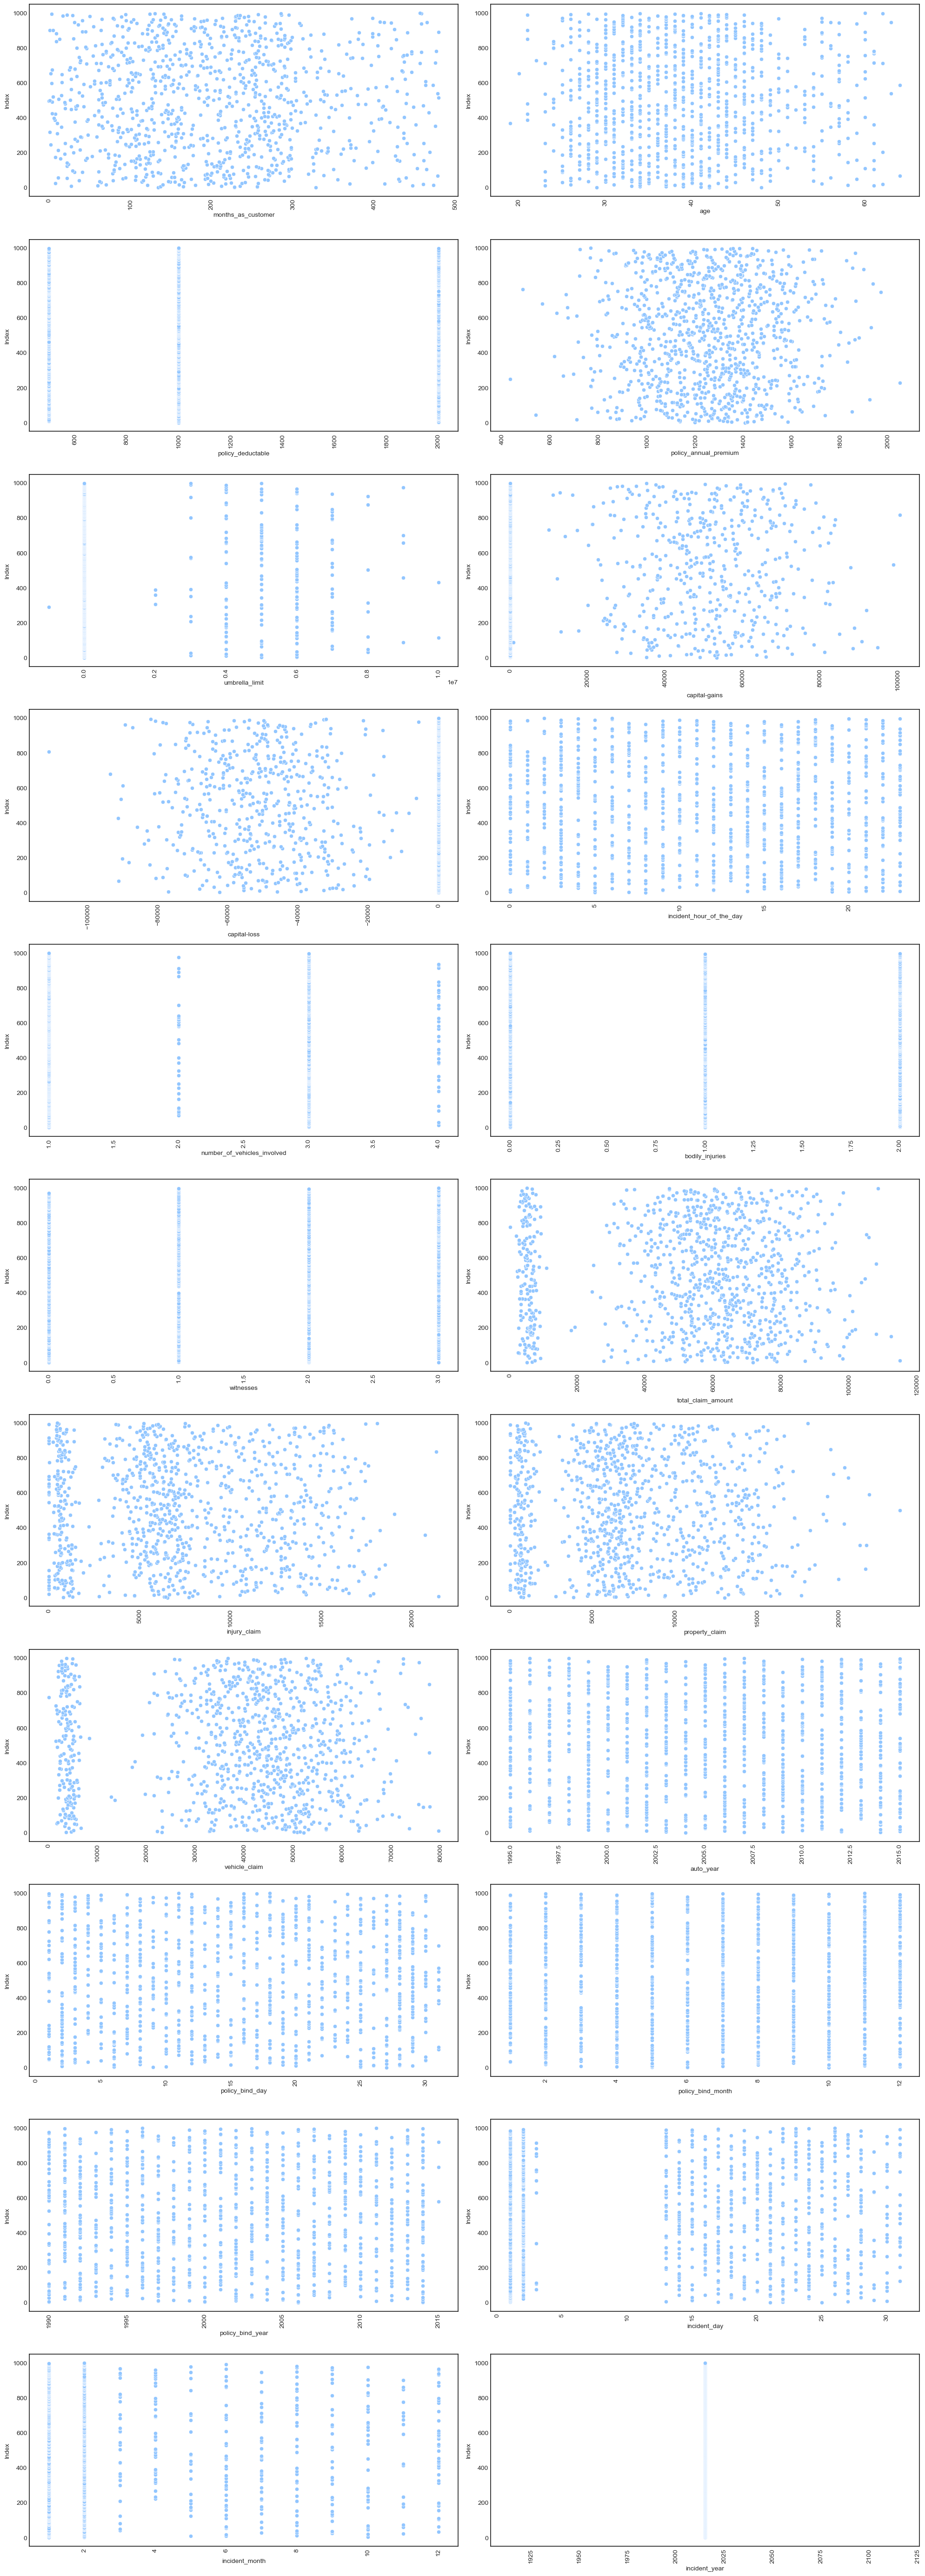

In [101]:
#we are plotting each numerical column against the index (row number) of the DataFrame
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=df.index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Index')

plt.tight_layout()
plt.show()

### Bivariate analysis

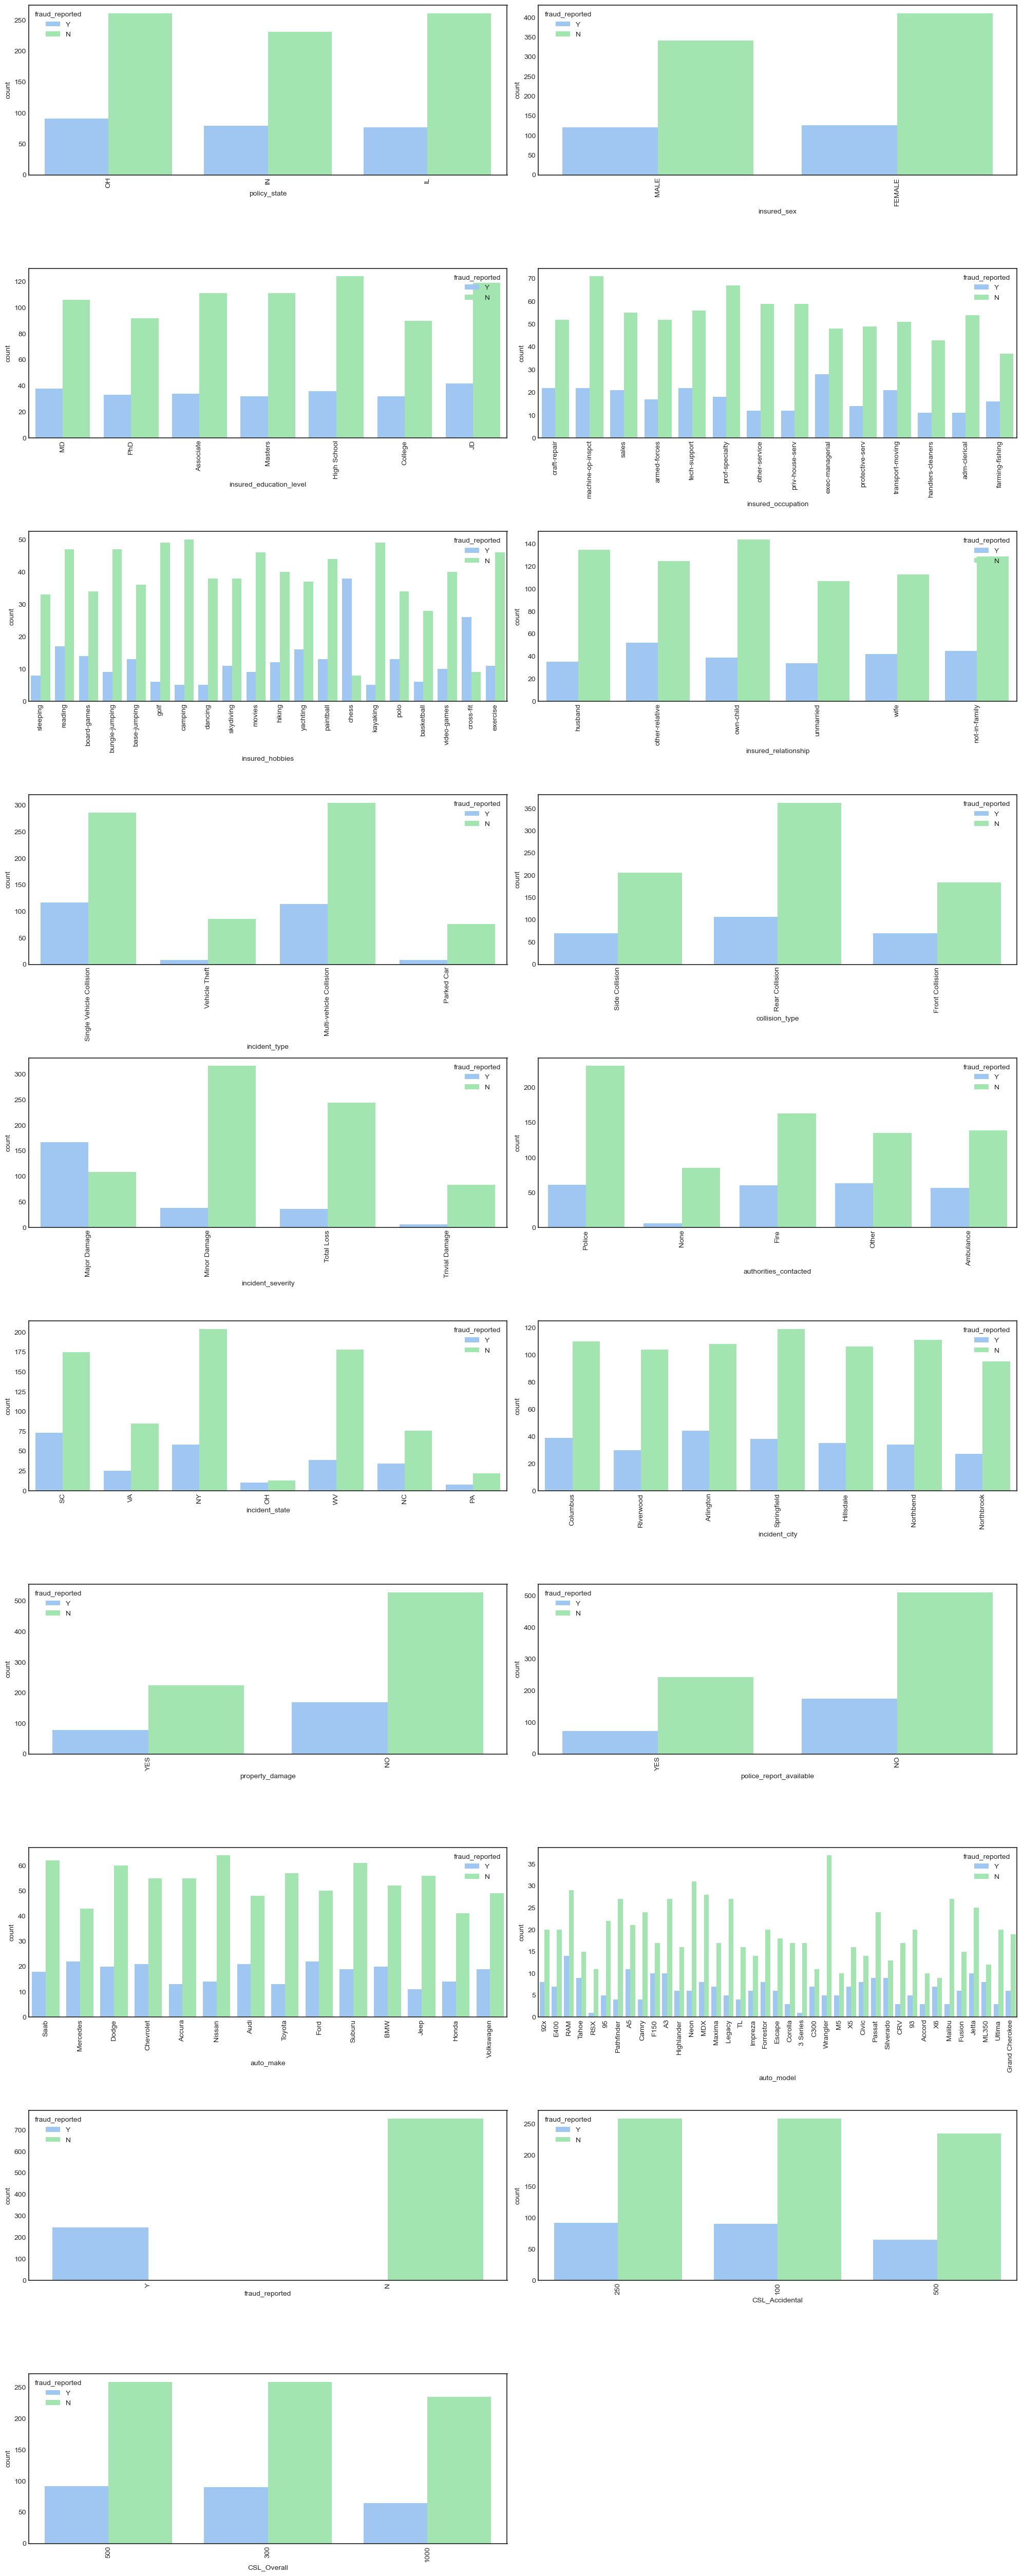

In [102]:
fig = plt.figure(figsize=(20, 60)) # bivariate analysis categorical and income column

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(12, 2, i + 1)
    sns.countplot(data=df, x=col,hue=df['fraud_reported'])
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [103]:
for i in categorical_feature:
    print(f'fraud_reported distribution by {i}')
    print(df.groupby(i)['fraud_reported'].value_counts())
    print('*'*50)

fraud_reported distribution by policy_state
policy_state  fraud_reported
IL            N                 261
              Y                  77
IN            N                 231
              Y                  79
OH            N                 261
              Y                  91
Name: fraud_reported, dtype: int64
**************************************************
fraud_reported distribution by insured_sex
insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: fraud_reported, dtype: int64
**************************************************
fraud_reported distribution by insured_education_level
insured_education_level  fraud_reported
Associate                N                 111
                         Y                  34
College                  N                  90
                         Y                  32
High School              N                 12

**Fraud Reported Distribution Summary:**

**Policy State:**
* IL and OH have a relatively higher percentage of fraud reported (Y) compared to IN.

**Insured Sex:**
* Both genders (FEMALE and MALE) have similar percentages of fraud reported (Y).

**Insured Education Level:**
* JD and MD holders have higher percentages of fraud reported (Y).

**Insured Occupation:**
* Exec-managerial and prof-specialty occupations have relatively higher percentages of fraud reported (Y).

**Insured Hobbies:**
* Skydiving and chess hobbies are associated with higher fraud reports.

**Insured Relationship:**
* All categories have some fraud reports, with husband having a slightly higher percentage.

**Incident Type:**
* Multi-vehicle Collision has a higher percentage of fraud reports compared to other incident types.

**Collision Type:**
* Rear Collision has a higher percentage of fraud reports compared to Front and Side Collisions.

**Incident Severity:**
* Major Damage and Minor Damage incidents have relatively higher percentages of fraud reported (Y).

**Authorities Contacted:**
* Police and Other contacts show higher percentages of fraud reports.

**Incident State:**
* SC and WV have relatively higher percentages of fraud reported (Y).

**Incident City:**
* Arlington and Columbus cities have higher percentages of fraud reported (Y).

**Property Damage:**
* Policies without property damage claims (NO) have higher fraud reports (Y).

**Police Report Available:**
* Policies without police reports (NO) have higher fraud reports (Y).

**Auto Make:**
* Audi, Mercedes, and Suburu have relatively higher percentages of fraud reports.

**Auto Model:**
* There are multiple auto models with varying percentages of fraud reports.

**Combined Single Limit (CSL) - Accidental and Overall:**
* CSLs with lower limits (100 and 250) have higher percentages of fraud reports (Y).

**Fraud Reported:**
* A summary of the overall fraud report distribution, with a majority being non-fraudulent (N).

Please note that these observations are based on the provided data and can be used as initial insights for further analysis or modeling.


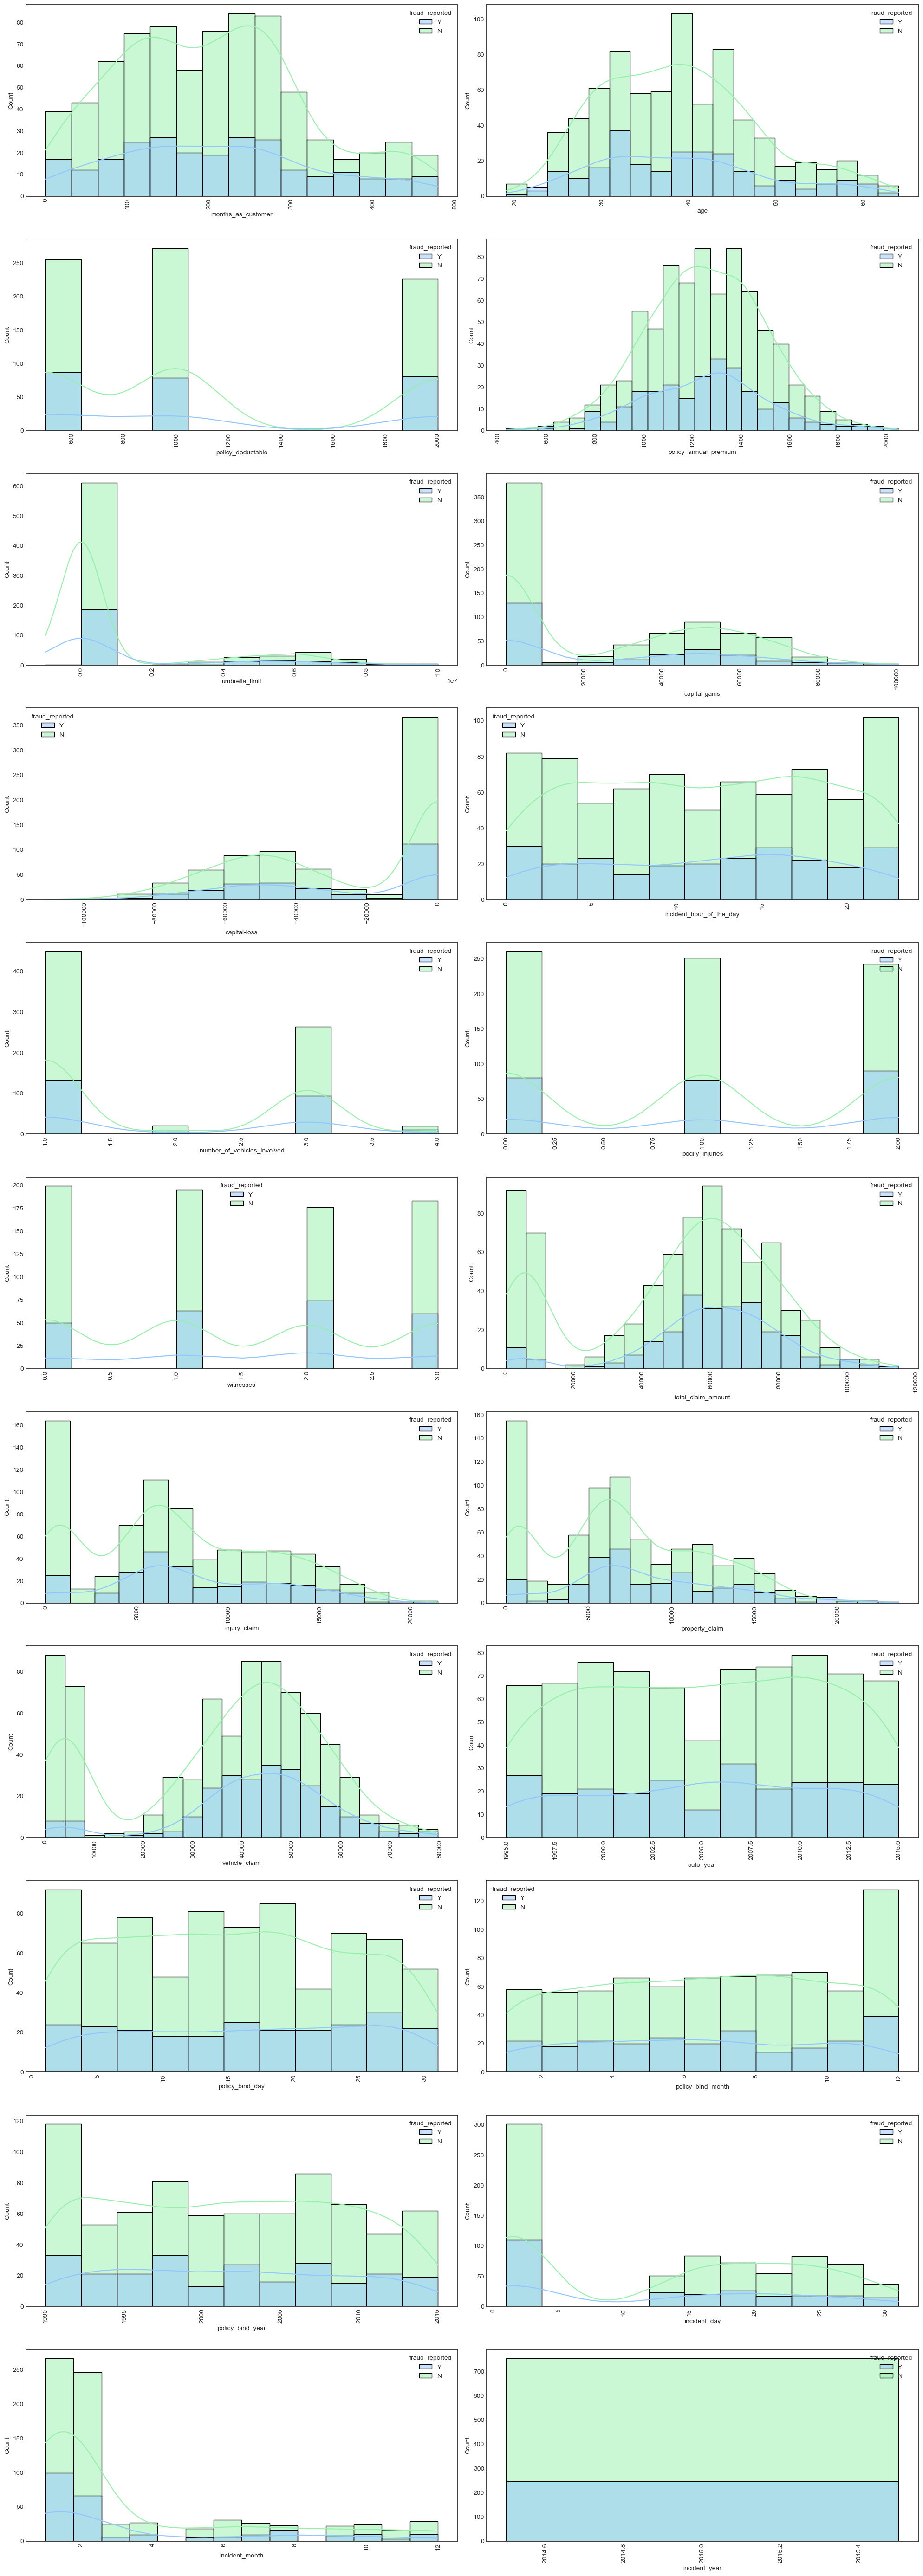

In [104]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col,hue=df['fraud_reported'],kde=True)
    plt.xlabel(col)
    plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

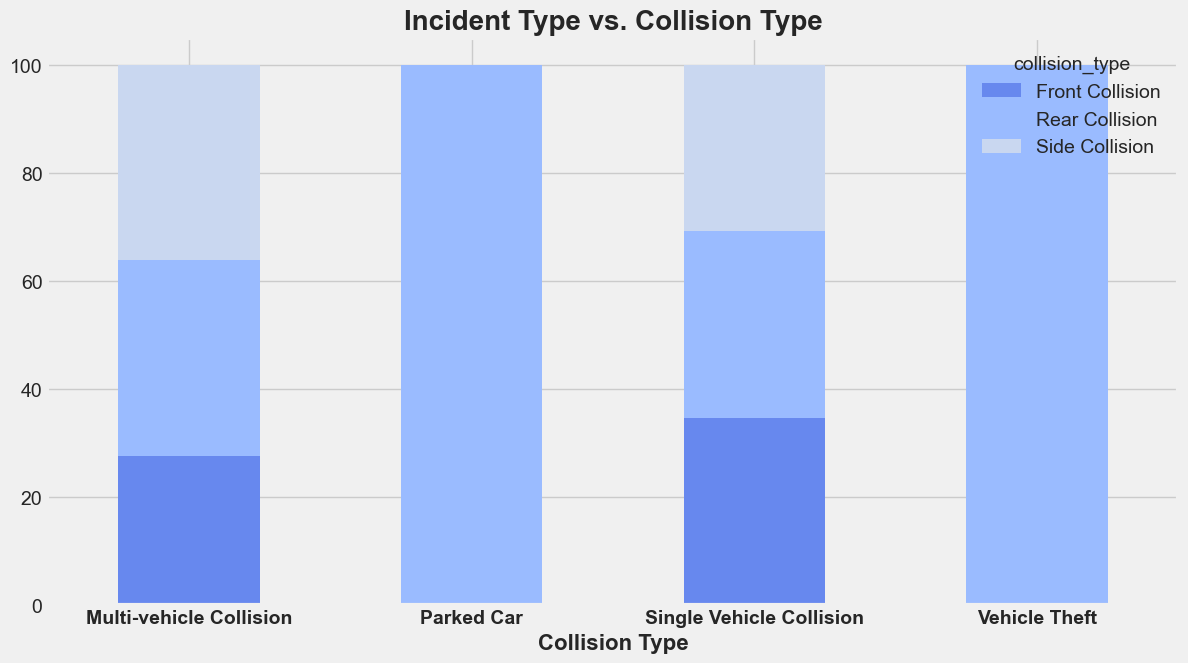

In [105]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 7)
sns.set_palette('coolwarm')

# Create a crosstab of 'incident_type' and 'collision_type'
cross_table = pd.crosstab(df['incident_type'], df['collision_type'])
percentage_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percentage_table.plot(kind='bar', stacked=True)
plt.title('Incident Type vs. Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Collision Type', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=0, fontweight='bold')

# Show the plot
plt.show()

In [106]:
cross_table = pd.crosstab(df['incident_type'], df['collision_type'])
percentage_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percentage_table

collision_type            Front Collision  Rear Collision  Side Collision
incident_type                                                            
Multi-vehicle Collision         27.446301       36.276850       36.276850
Parked Car                       0.000000      100.000000        0.000000
Single Vehicle Collision        34.491315       34.739454       30.769231
Vehicle Theft                    0.000000      100.000000        0.000000

**Observations from Percentage Table of Incident Type vs. Collision Type**

**Multi-vehicle Collision:**
* Front Collision: Approximately 27.45% of multi-vehicle collisions involve front collisions.
* Rear Collision: Approximately 36.28% of multi-vehicle collisions involve rear collisions.
* Side Collision: Approximately 36.28% of multi-vehicle collisions involve side collisions.

**Parked Car:**
* Rear Collision: In the case of parked cars, 100% of incidents involve rear collisions.
* Front Collision and Side Collision: There are no recorded incidents of front or side collisions with parked cars.

**Single Vehicle Collision:**
* Front Collision: Approximately 34.49% of single-vehicle collisions involve front collisions.
* Rear Collision: Approximately 34.74% of single-vehicle collisions involve rear collisions.
* Side Collision: Approximately 30.77% of single-vehicle collisions involve side collisions.

**Vehicle Theft:**
* Rear Collision: In the case of vehicle theft, 100% of incidents involve rear collisions.
* Front Collision and Side Collision: There are no recorded incidents of front or side collisions in vehicle theft cases.

These observations provide insights into the distribution of collision types for different incident types. For example, multi-vehicle collisions are relatively evenly distributed between front, rear, and side collisions, while parked cars are almost exclusively involved in rear collisions. Understanding these patterns can be valuable for risk assessment and claims processing in the insurance industry.

### Encoding categorical Feature

In [107]:
# Using Label Encoder on categorical variable
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  fraud_reported  policy_bind_day  policy_bind_month  \
0           1       2004               1               17                 10   
1          12       2007               1               27                  6   
2          30       2007               0                9                  6   
3          34       2014               1               25                  5   
4          31       2009               0                6                  6   

   policy_bind_year  incident_day  incident_month  incident_year  \
0              2014            25     

### Handling Outliers

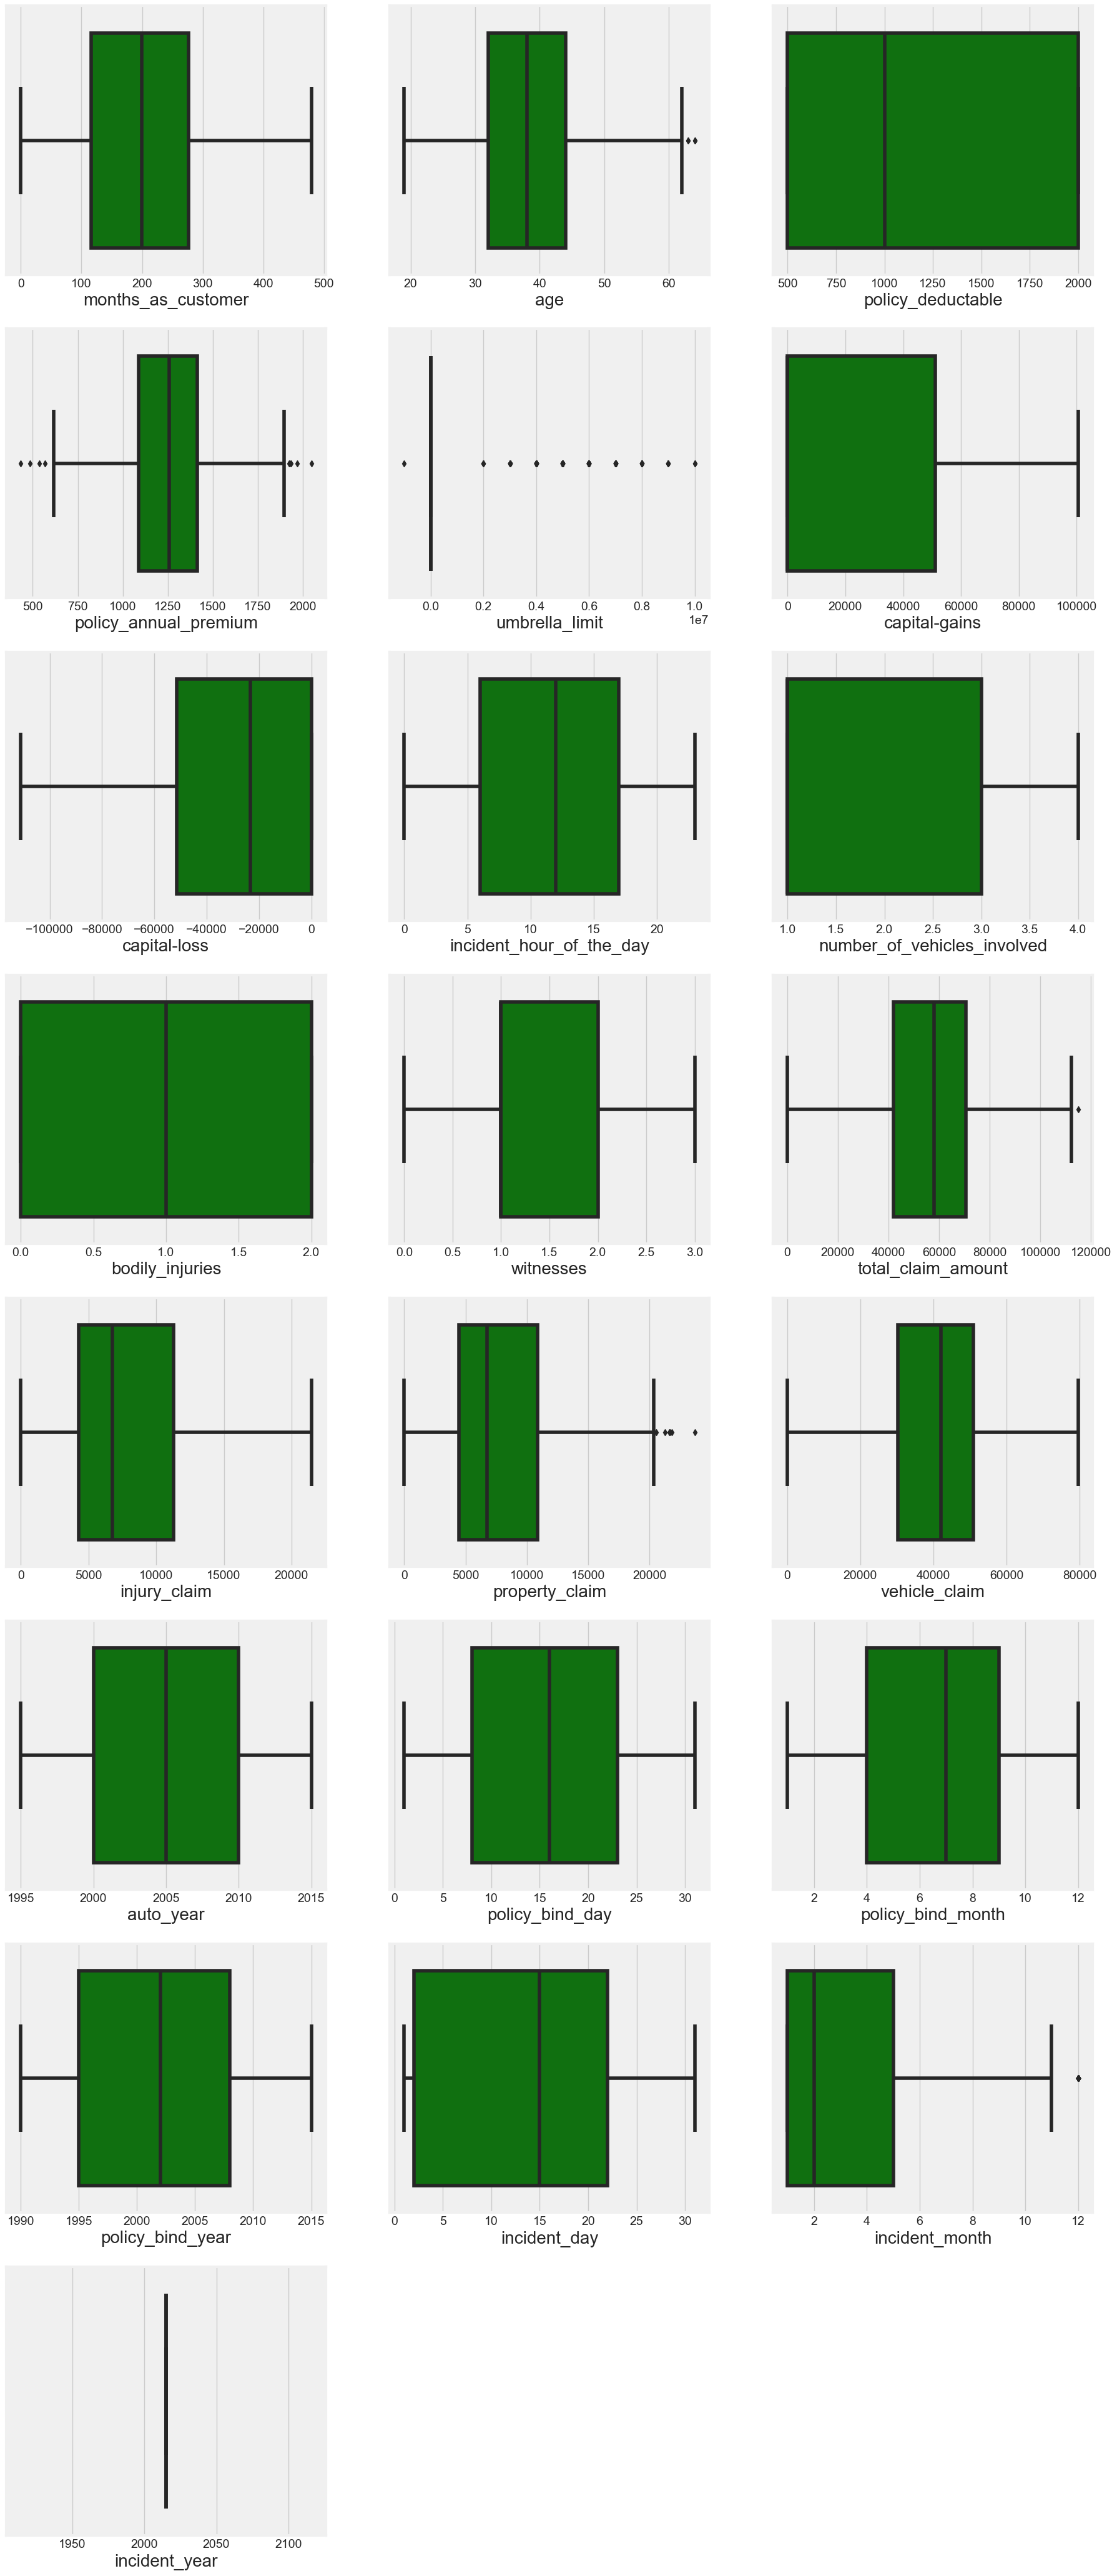

In [108]:
#checking outliers by boxplot
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in numerical_feature:
    if plotnumber<=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [109]:
df.shape

(1000, 41)

**Removing of Outliers by using Z-Score Method:**

In [110]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [111]:
df = remove_outliers_zscore(df,df.columns)
df

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48             2               1000   
1                   228   42             1               2000   
2                   134   29             2               2000   
3                   256   41             0               2000   
4                   228   44             0               1000   
..                  ...  ...           ...                ...   
995                   3   38             2               1000   
996                 285   41             0               1000   
997                 130   34             2                500   
998                 458   62             0               2000   
999                 456   60             2               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  \
0                          4                   2               17   
1                          4                   6               15   
2                          6                  11                2   
3                          6                   1                2   
4                          0                  11                2   
..                       ...                 ...              ...   
995                        5                   2               13   
996                        6                   9               17   
997                        5                   1                3   
998                        0                   5                0   
999                        0                  11               11   

     insured_relationship  capital-gains  capital-loss  incident_type  \
0                       0          53300             0              2   
1                       2              0             0              3   
2                       3          35100             0              0   
3                       4          48900        -62400              2   
4                       4          66000        -46000              3   
..                    ...            ...           ...            ...   
995                     4              0             0              2   
996                     5          70900             0              2   
997                     2          35100             0              0   
998                     5              0             0              2   
999                     0              0             0              1   

     collision_type  incident_severity  authorities_contacted  incident_state  \
0                 2                  0                      4               4   
1                 1                  1                      4               5   
2                 1                  1                      4               1   
3                 0                  0                      4               2   
4                 1                  1                      2               1   
..              ...                ...                    ...             ...   
995               0                  1                      1               0   
996               1                  0                      1               4   
997               2                  1                      4               0   

**Heat Map:**

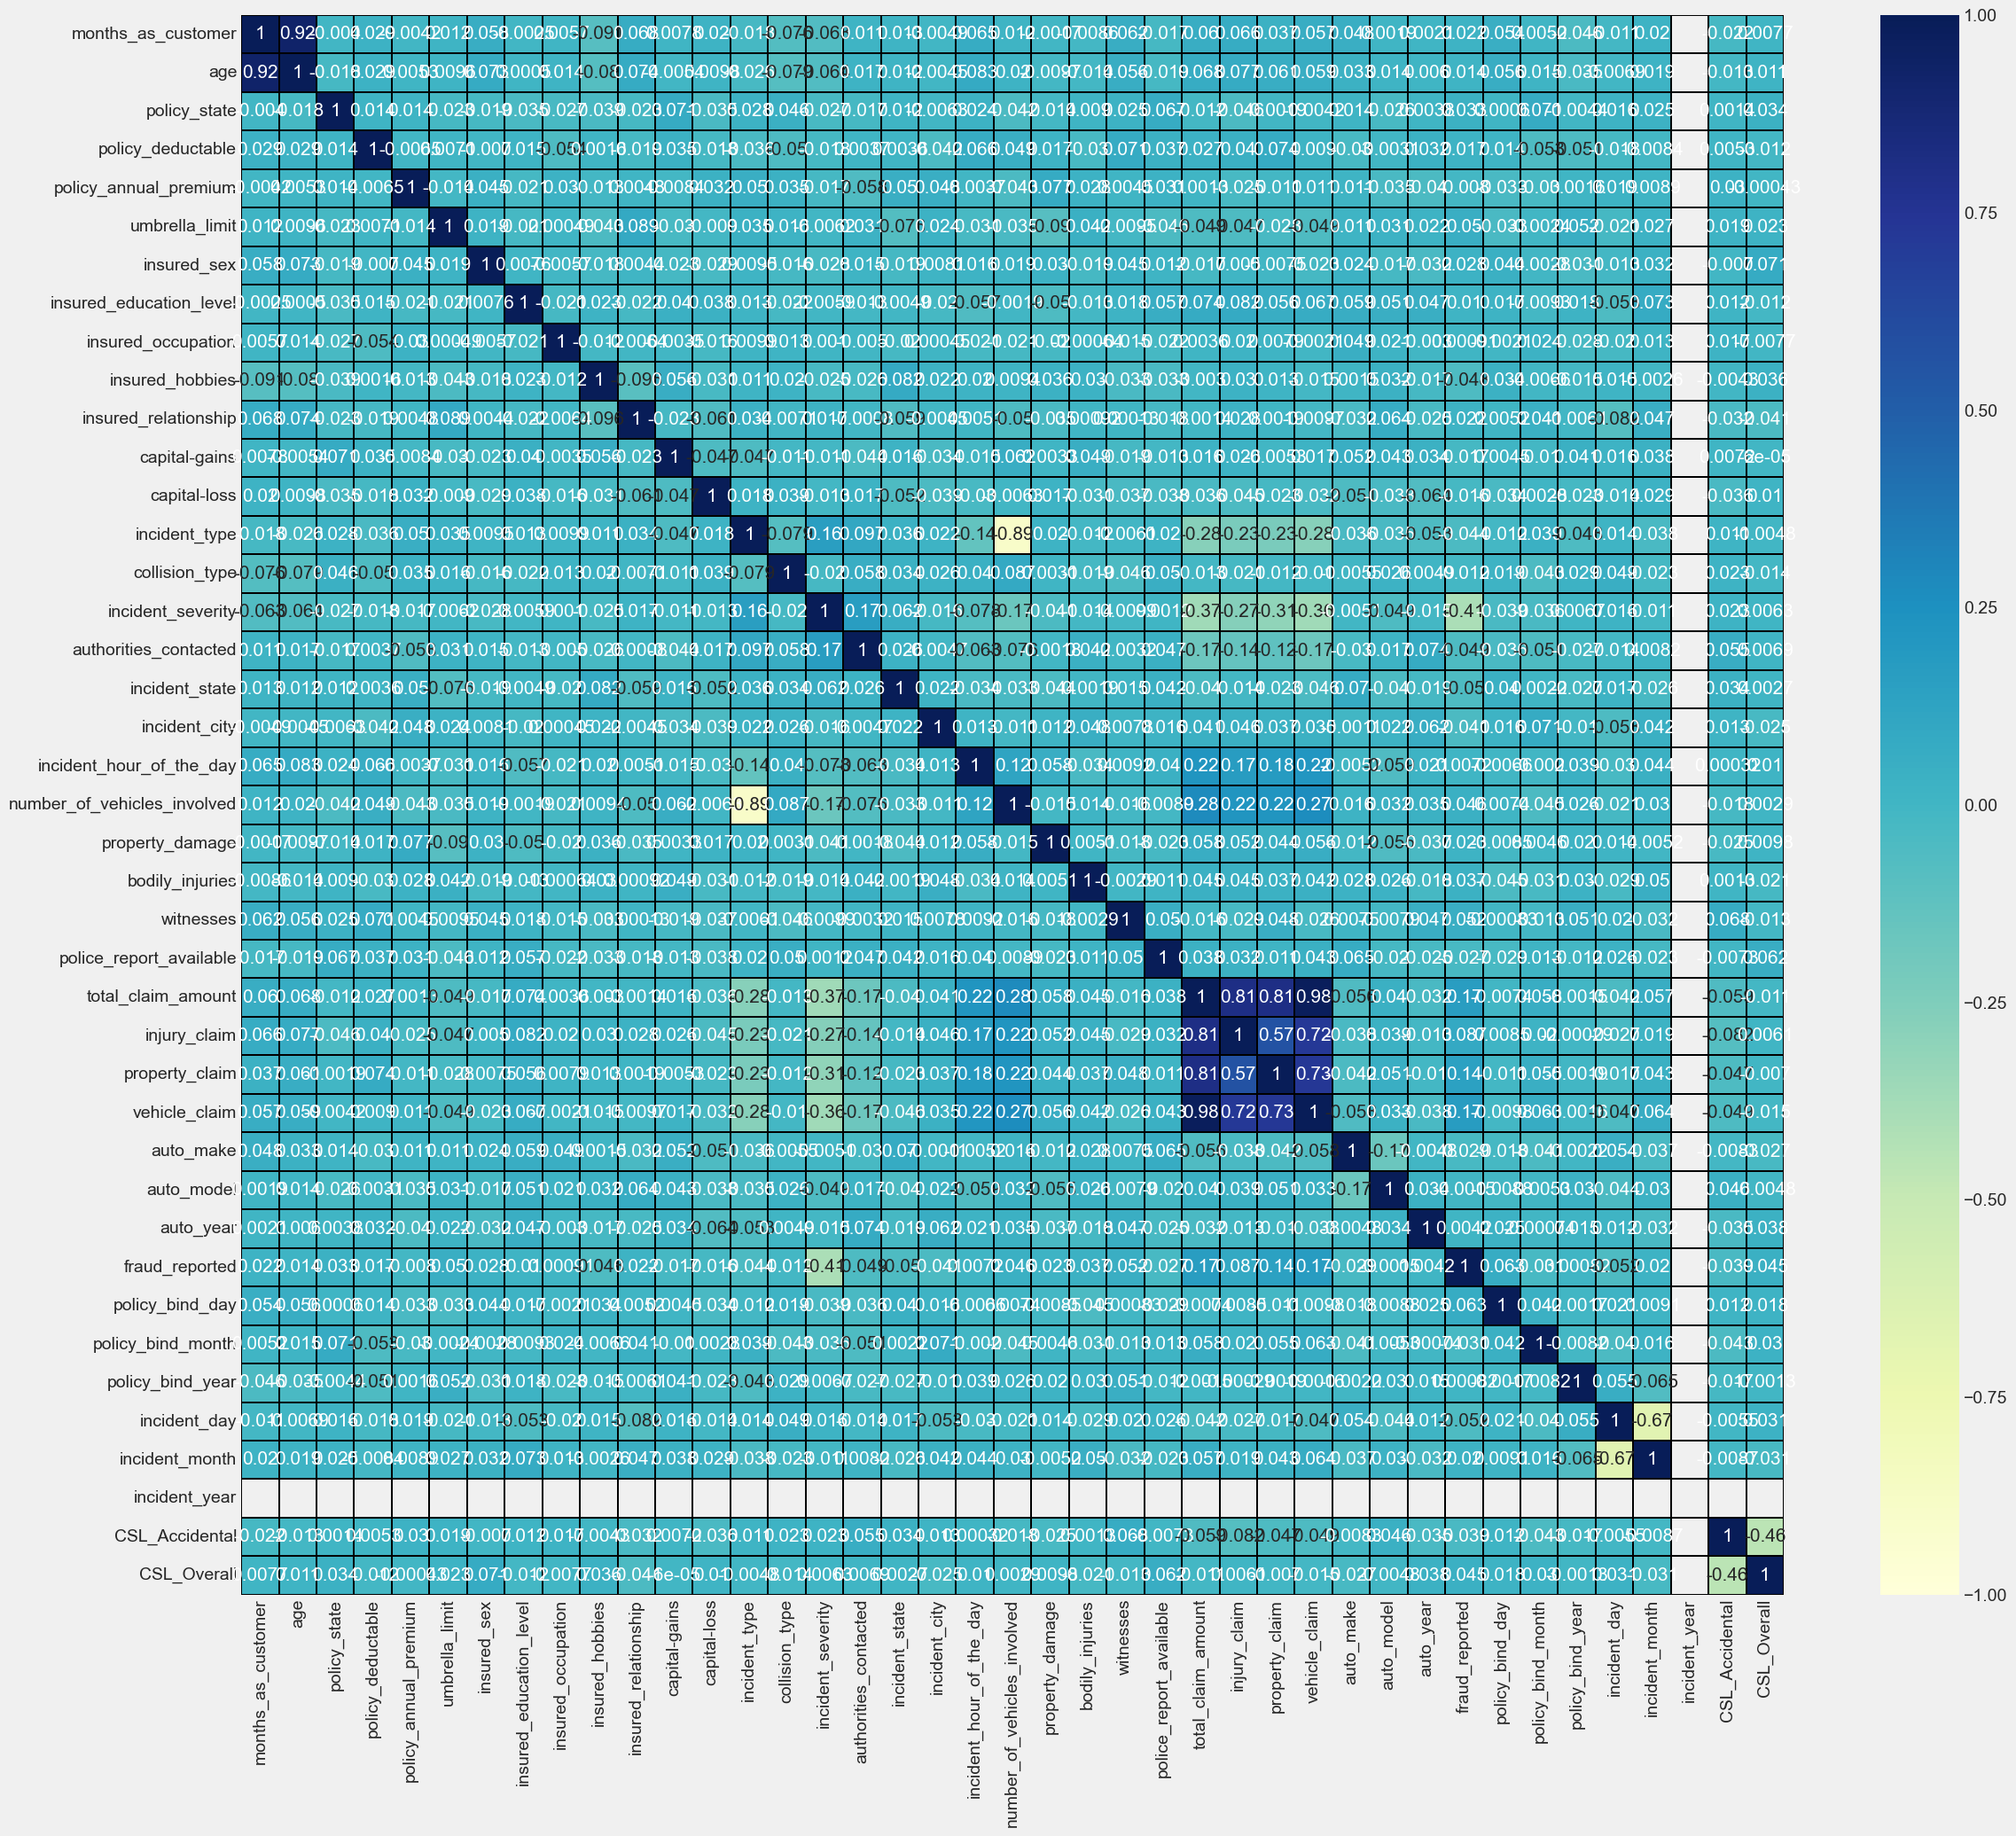

In [112]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

some features are highly correlated with each other

**Checking Correlation with Target Column:**

In [113]:
#correlation with target column
correlation_with_quality = df.corr()['fraud_reported'].abs().sort_values(ascending=False)
print(correlation_with_quality)

fraud_reported                 1.000000
incident_severity              0.405677
vehicle_claim                  0.172333
total_claim_amount             0.165041
property_claim                 0.140973
injury_claim                   0.086910
policy_bind_day                0.062602
witnesses                      0.052155
incident_day                   0.051649
incident_state                 0.050457
umbrella_limit                 0.050356
authorities_contacted          0.048752
insured_hobbies                0.048072
number_of_vehicles_involved    0.045825
CSL_Overall                    0.045193
incident_type                  0.044068
incident_city                  0.041002
CSL_Accidental                 0.038599
bodily_injuries                0.036601
policy_state                   0.033416
policy_bind_month              0.030508
auto_make                      0.028546
insured_sex                    0.027622
police_report_available        0.026566
property_damage                0.022820


<AxesSubplot:>

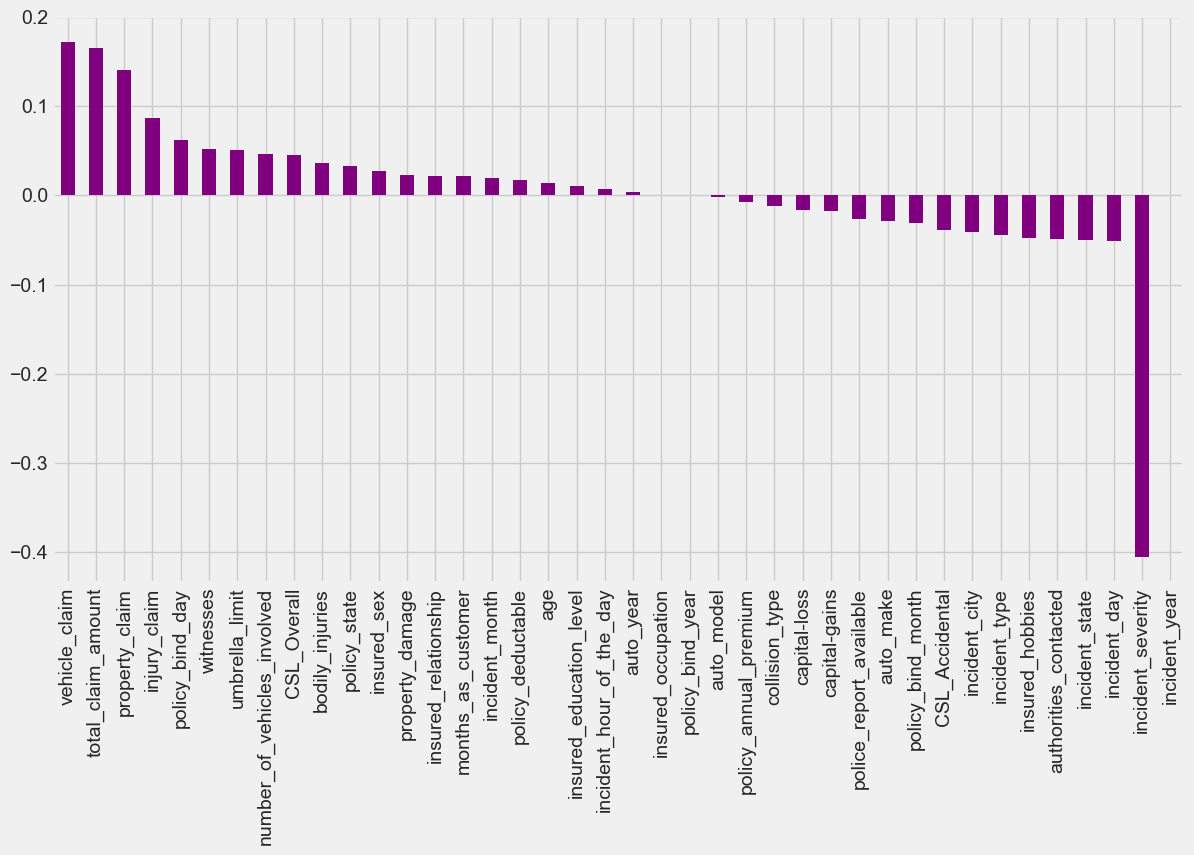

In [114]:
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar', color='purple')

In [115]:
unnecessary_columns = ['incident_year','insured_occupation','auto_model','auto_year','policy_bind_year','incident_hour_of_the_day']

In [116]:
df.drop(unnecessary_columns,axis=1,inplace=True)

In [117]:
df.head(2)

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   

   insured_education_level  insured_hobbies  insured_relationship  \
0                        4               17                     0   
1                        4               15                     2   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               2   
1              0             0              3               1   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                1                1          2   
1                            1                0                0          0   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1               71610          6510           13020   
1                        0                5070           780             780   

   vehicle_claim  auto_make  fraud_reported  policy_bind_day  \
0          52080         10               1               17   
1           3510          8               1               27   

   policy_bind_month  incident_day  incident_month  CSL_Accidental  \
0                 10            25               1               1   
1                  6            21               1               1   

   CSL_Overall  
0            2  
1            2

In [118]:
df.shape

(988, 35)

**Checking Correlation between columns to columns:**

In [119]:
#checking correlation
df_corr = df.corr()
df_corr

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922654     -0.003979   
age                                    0.922654  1.000000     -0.018274   
policy_state                          -0.003979 -0.018274      1.000000   
policy_deductable                      0.029014  0.029268      0.014318   
policy_annual_premium                 -0.004210  0.005341      0.013918   
umbrella_limit                         0.012183  0.009622     -0.022568   
insured_sex                            0.057838  0.073431     -0.019320   
insured_education_level               -0.002547  0.000495     -0.034504   
insured_hobbies                       -0.091161 -0.079876     -0.038602   
insured_relationship                   0.067900  0.073960     -0.023188   
capital-gains                          0.007765 -0.005402      0.070839   
capital-loss                           0.019925  0.009817     -0.034865   
incident_type                         -0.017963 -0.026339      0.028102   
collision_type                        -0.075550 -0.079240      0.046220   
incident_severity                     -0.062922 -0.063932     -0.027324   
authorities_contacted                  0.011462  0.016564     -0.017344   
incident_state                         0.013142  0.011774      0.012345   
incident_city                         -0.004890 -0.004492     -0.006296   
number_of_vehicles_involved            0.011667  0.019582     -0.042126   
property_damage                       -0.001707 -0.009725     -0.013636   
bodily_injuries                       -0.008598 -0.014072      0.009009   
witnesses                              0.061634  0.055780      0.025044   
police_report_available               -0.016560 -0.018589      0.067348   
total_claim_amount                     0.060089  0.067852     -0.011764   
injury_claim                           0.066406  0.077340     -0.045613   
property_claim                         0.036649  0.061408     -0.001868   
vehicle_claim                          0.057476  0.059198     -0.004159   
auto_make                              0.048190  0.032650      0.013692   
fraud_reported                         0.021653  0.013763      0.033416   
policy_bind_day                        0.053967  0.055801      0.000604   
policy_bind_month                      0.005194  0.014836      0.070918   
incident_day                          -0.010862 -0.006944      0.016449   
incident_month                         0.019957  0.018927      0.024735   
CSL_Accidental                        -0.022346 -0.012761      0.001354   
CSL_Overall                            0.007718  0.010564      0.033511   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.029014              -0.004210   
age                                   0.029268               0.005341   
policy_state                          0.014318               0.013918   
policy_deductable                     1.000000              -0.006525   
policy_annual_premium                -0.006525               1.000000   
umbrella_limit                        0.007118              -0.014199   
insured_sex                          -0.007044               0.044626   
insured_education_level               0.015475              -0.021300   
insured_hobbies                       0.001570              -0.013264   
insured_relationship                 -0.018639               0.004761   
capital-gains                         0.034552              -0.008406   
capital-loss                         -0.018304               0.032158   
incident_type                        -0.035912               0.049727   
collision_type                       -0.050408               0.034586   
incident_severity                    -0.017625              -0.017383   
authorities_contacted                 0.003672              -0.058364   
incident_state                        0.003605               0.049563   
incident_city 

We are writing this function to see those columns which are highly correlated with each other

In [120]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [121]:
features_to_drop

{'age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'}

Here we are dropping above featurs except age column

In [123]:
df.drop(columns=['injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'],axis=1,inplace=True)

### VIF

In [124]:
df1=df.copy()

In [125]:
#drop target column
df1.drop('fraud_reported',axis=1, inplace=True)

In [126]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [127]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

features       vif
0        months_as_customer  6.812639
1                       age  6.817150
2              policy_state  1.033343
3         policy_deductable  1.023395
4     policy_annual_premium  1.032095
5            umbrella_limit  1.039606
6               insured_sex  1.025858
7   insured_education_level  1.033217
8           insured_hobbies  1.041411
9      insured_relationship  1.047384
10            capital-gains  1.030414
11             capital-loss  1.033659
12            incident_type  1.127549
13           collision_type  1.042552
14        incident_severity  1.193190
15    authorities_contacted  1.075613
16           incident_state  1.041353
17            incident_city  1.023707
18          property_damage  1.031781
19          bodily_injuries  1.023059
20                witnesses  1.025777
21  police_report_available  1.040106
22       total_claim_amount  1.295565
23                auto_make  1.041818
24          policy_bind_day  1.023561
25        policy_bind_month  1.035416
26             incident_day  1.839767
27           incident_month  1.841891
28           CSL_Accidental  1.300494
29              CSL_Overall  1.301527

There is no Multicollinearty we are good to go For Prediction

### Splitting Columns  into Feature and Target column

In [130]:
X= df.drop('fraud_reported', axis=1)
Y=df['fraud_reported']

In [131]:
X.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_hobbies  insured_relationship  \
0                        4               17                     0   
1                        4               15                     2   
2                        6                2                     3   
3                        6                2                     4   
4                        0                2                     4   

   capital-gains  capital-loss  incident_type  collision_type  \
0          53300             0              2               2   
1              0             0              3               1   
2          35100             0              0               1   
3          48900        -62400              2               0   
4          66000        -46000              3               1   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   
2                  1                      4               1              1   
3                  0                      4               2              0   
4                  1                      2               1              0   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  auto_make  policy_bind_day  policy_bind_month  \
0               71610         10               17                 10   
1                5070          8               27                  6   
2               34650          4                9                  6   
3               63400          3               25                  5   
4                6500          0                6                  6   

   incident_day  incident_month  CSL_Accidental  CSL_Overall  
0            25               1               1            2  
1            21               1               1            2  
2            22               2               0            1  
3             1              10               1            2  
4            17               2               2            0

In [133]:
X.shape

(988, 30)

In [132]:
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 988, dtype: int32

In [134]:
Y.shape

(988,)

**Checking Skewness:**

In [135]:
X.skew()

months_as_customer         0.364303
age                        0.478116
policy_state              -0.032200
policy_deductable          0.478464
policy_annual_premium      0.035686
umbrella_limit             1.776463
insured_sex                0.138189
insured_education_level    0.002485
insured_hobbies           -0.059031
insured_relationship       0.076198
capital-gains              0.470407
capital-loss              -0.384896
incident_type              0.093061
collision_type            -0.035588
incident_severity          0.281538
authorities_contacted     -0.120423
incident_state            -0.148839
incident_city              0.047091
property_damage            0.860557
bodily_injuries            0.005597
witnesses                  0.029226
police_report_available    0.803919
total_claim_amount        -0.593346
auto_make                 -0.026157
policy_bind_day            0.026616
policy_bind_month         -0.021949
incident_day               0.050882
incident_month             1

`umbrella_limit`,`property_damage`,`police_report_available`,`total_claim_amount`,`incident_month` columns have high skewness above +/- 0.5. which is not acceptable.

In [136]:
skew = ['umbrella_limit','property_damage','police_report_available','total_claim_amount','incident_month']

**Removing Skewness using Power Transform Method:**

In [138]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
pt = PowerTransformer(method='yeo-johnson')

In [139]:
X[skew] = pt.fit_transform(X[skew])

### Standardization


In [141]:
sc=StandardScaler()

In [142]:
X=sc.fit_transform(X)

### Data Balancing

In [143]:
sm=SMOTE()

In [144]:
x,y=sm.fit_resample(X,Y)

In [145]:
x.shape , y.shape

((1490, 30), (1490,))

### Model Building

### Find best Randomstate

In [146]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7986577181208053 on Random State = 58


In [147]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

### Defining All Classification Models

In [151]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

### Model training

In [152]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 79.86577181208054
Confusion Matrix of  LogisticRegression()  is 
 [[115  28]
 [ 32 123]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       143
           1       0.81      0.79      0.80       155

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298

******************************
Accuracy_Score of  RidgeClassifier() is 78.85906040268456
Confusion Matrix of  RidgeClassifier()  is 
 [[112  31]
 [ 32 123]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       143
           1       0.80      0.79      0.80       155

    accuracy                           0.79       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298

******************************
Accuracy_Score of  Decisio

### CrossValidation

In [153]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 79.86577181208054
cross Validation accuracy score of  LogisticRegression()  is  75.30201342281879
**************************************************
Accuracy_Score of  RidgeClassifier() is 78.85906040268456
cross Validation accuracy score of  RidgeClassifier()  is  75.36912751677852
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 85.57046979865773
cross Validation accuracy score of  DecisionTreeClassifier()  is  83.6241610738255
**************************************************
Accuracy_Score of  SVC() is 89.26174496644296
cross Validation accuracy score of  SVC()  is  85.1006711409396
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 71.47651006711409
cross Validation accuracy score of  KNeighborsClassifier()  is  70.20134228187919
**************************************************
Accuracy_Score of  RandomForestClassifier() is 90.26845637583892
c

GradientBoostingClassifier  is the best model among all models because which gave best accuracy score

### Hyperparameter tuning on GradientBoostingClassifier

In [154]:
param_grid = {
    'n_estimators': [200, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 4, 7]
}
param_grid

{'n_estimators': [200, 600, 1000],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [155]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [156]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='auto',
                           min_samples_leaf=4, min_samples_split=3,
                           n_estimators=1000)

In [157]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9328859060402684

### RUC AOC Curve/Plot

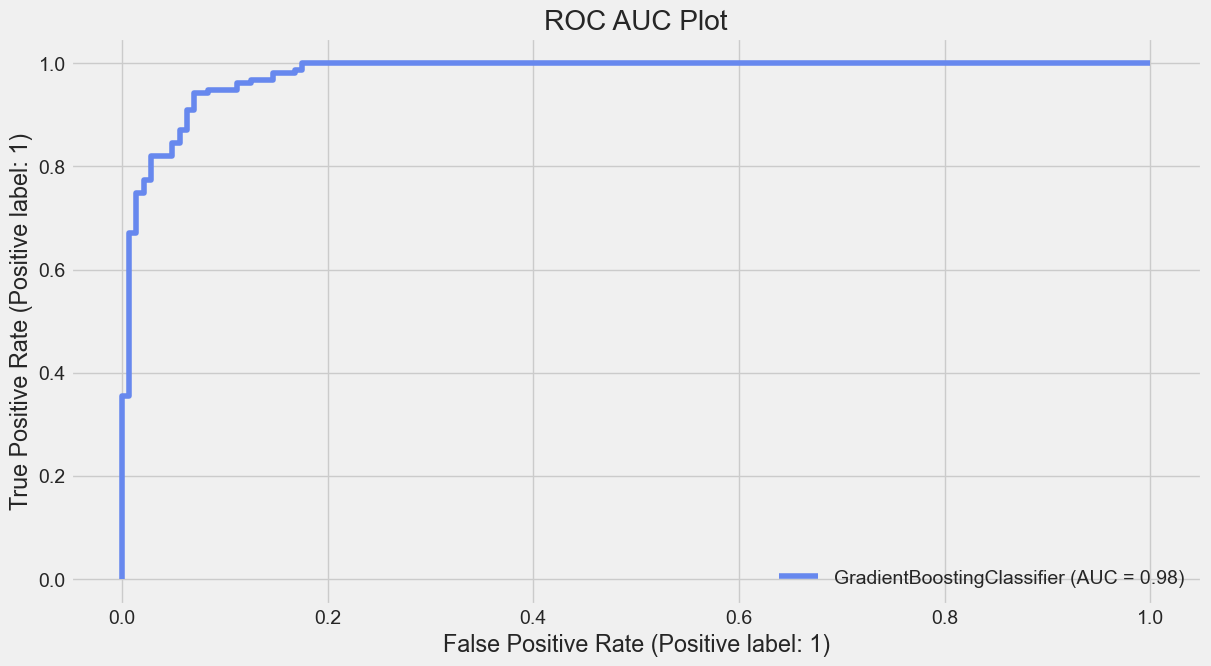

In [158]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

### Confusion matrix

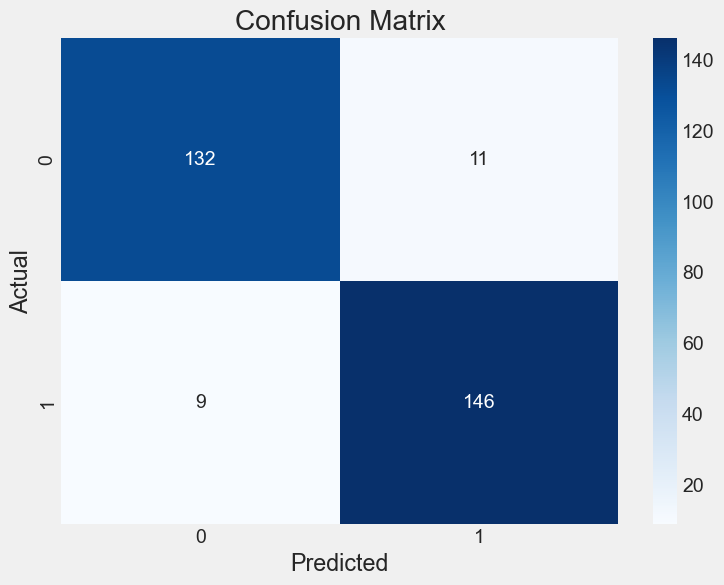

In [159]:
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving Model

In [161]:
file_path = 'Insurance_Claim_Fraud.pkl'
with open(file_path, 'wb') as file:
    # Use the pickle.dump() method to save the object to the file
    pickle.dump(grid_search.best_estimator_, file)

# Project Completed